In [9]:
from pyevolve import G1DList
from pyevolve import GSimpleGA
from pyevolve import Selectors
from pyevolve import Statistics
from pyevolve import Mutators
from pyevolve import Crossovers
from pyevolve import Consts
from pyevolve import Initializators
from pyevolve import DBAdapters
import matplotlib.pyplot as plt

from vincenty import vincenty

import sys, random
from math import sin, cos, sqrt, atan2, radians,acos

In [10]:
LAT = [16.47, 16.47, 20.09, 22.39, 25.23, 22.00, 20.47, 17.20, 16.30, 14.05, 16.53, 21.52, 19.41, 20.09]
LON = [96.10, 94.44, 92.54, 93.37, 97.24, 96.05, 97.02, 96.29, 97.38, 98.12, 97.38, 95.59, 97.13, 94.55]

COORD = zip(LAT, LON)
print(COORD)

[(16.47, 96.1), (16.47, 94.44), (20.09, 92.54), (22.39, 93.37), (25.23, 97.24), (22.0, 96.05), (20.47, 97.02), (17.2, 96.29), (16.3, 97.38), (14.05, 98.12), (16.53, 97.38), (21.52, 95.59), (19.41, 97.13), (20.09, 94.55)]


In [11]:
def getDistance(city1,city2):
    return vincenty(city1,city2)

In [12]:
def fitness(chromosome):
    score = 0.0
    # iterate over the chromosome
    for i in range(len(chromosome)):
        city1 = chromosome[i];
        if(i + 1 == len(chromosome)) :
            city2 = chromosome[0]
        else:
            city2 = chromosome[i+1]   
        score += getDistance(COORD[city1],COORD[city2])
            
    return score

In [13]:
list = [10, 7, 12, 6, 11, 5, 4, 3, 2, 13, 1, 0, 9, 8]
tour = fitness(list)
print(tour)

3346.761973


In [14]:
def current_best(ga_engine):
    # Here you have access to the GA Engine
    print(ga.bestIndividual())
    return False

In [15]:
def Initializator(genome, **args):
    genome.clearList()
    lst = [i for i in xrange(genome.getListSize())]
    
    for i in xrange(genome.getListSize()):
        choice = random.choice(lst)
        lst.remove(choice)
        genome.append(choice)

In [28]:
# Chromosome representation

# genome = List of elements
genome = G1DList.G1DList(len(COORD))

# elements = values in the range rangemin and rangemax
genome.setParams(rangemin=0, rangemax=10, gauss_mu=0, gauss_sigma=1)

# how to compute the fitness
genome.evaluator.set(fitness)
genome.mutator.set(Mutators.G1DListMutatorSwap)
genome.crossover.set(Crossovers.G1DListCrossoverOX)
genome.initializator.set(Initializator)




# GA initialisation
ga = GSimpleGA.GSimpleGA(genome, seed=999)

# Number of generations
ga.setGenerations(1000)
ga.setMinimax(Consts.minimaxType["minimize"])
ga.setCrossoverRate(0.0)
ga.setMutationRate(0.1)
ga.setPopulationSize(10)
ga.selector.set(Selectors.GRouletteWheel)
ga.setElitism(True)

# Record evolution results in a database
sqlite_adapter = DBAdapters.DBSQLite(identify="tsp")
ga.setDBAdapter(sqlite_adapter)


# In case we want to monitor the evolution process
# execute the function current_best every generation
#ga.stepCallback.set(current_best)

ga.evolve(freq_stats=10)

best = ga.bestIndividual()

# Final best solution
print(best)

bestList = best.genomeList

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [7913.81(7823.32)/5812.55(5866.22)/6594.84(6594.84)]
Gen. 10 (1.00%): Max/Min/Avg Fitness(Raw) [6948.92(6478.12)/3227.09(4269.25)/5790.77(5790.77)]
Gen. 20 (2.00%): Max/Min/Avg Fitness(Raw) [6334.11(6398.51)/4221.51(4157.03)/5278.42(5278.42)]
Gen. 30 (3.00%): Max/Min/Avg Fitness(Raw) [6171.09(6201.40)/3783.74(3743.69)/5142.57(5142.57)]
Gen. 40 (4.00%): Max/Min/Avg Fitness(Raw) [6220.04(6347.94)/3816.63(3648.01)/5183.37(5183.37)]
Gen. 50 (5.00%): Max/Min/Avg Fitness(Raw) [6628.67(7020.02)/4109.46(3608.42)/5523.89(5523.89)]
Gen. 60 (6.00%): Max/Min/Avg Fitness(Raw) [5600.55(5457.83)/3417.34(3608.42)/4667.12(4667.12)]
Gen. 70 (7.00%): Max/Min/Avg Fitness(Raw) [6108.80(6590.55)/3963.39(3429.99)/5090.67(5090.67)]
Gen. 80 (8.00%): Max/Min/Avg Fitness(Raw) [6327.76(6739.37)/3887.54(3346.76)/5273.13(5273.13)]
Gen. 90 (9.00%): Max/Min/Avg Fitness(Raw) [6086.05(5785.16)/2619.28(3346.76)/5071.71(5071.71)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4976.8

Gen. 850 (85.00%): Max/Min/Avg Fitness(Raw) [5051.96(5306.19)/3546.96(3346.76)/4209.96(4209.96)]
Gen. 860 (86.00%): Max/Min/Avg Fitness(Raw) [6348.25(6325.83)/3304.69(3346.76)/5290.21(5290.21)]
Gen. 870 (87.00%): Max/Min/Avg Fitness(Raw) [5883.23(6300.53)/3811.25(3346.76)/4902.69(4902.69)]
Gen. 880 (88.00%): Max/Min/Avg Fitness(Raw) [5584.24(5882.88)/3664.21(3346.76)/4653.53(4653.53)]
Gen. 890 (89.00%): Max/Min/Avg Fitness(Raw) [5859.99(6023.09)/3566.64(3346.76)/4883.33(4883.33)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [6783.03(6682.67)/3122.13(3346.76)/5652.53(5652.53)]
Gen. 910 (91.00%): Max/Min/Avg Fitness(Raw) [6263.46(6493.34)/3684.75(3346.76)/5219.55(5219.55)]
Gen. 920 (92.00%): Max/Min/Avg Fitness(Raw) [6377.43(6567.76)/3645.61(3346.76)/5314.52(5314.52)]
Gen. 930 (93.00%): Max/Min/Avg Fitness(Raw) [6547.97(7405.15)/4274.94(3346.76)/5456.64(5456.64)]
Gen. 940 (94.00%): Max/Min/Avg Fitness(Raw) [6627.37(6982.85)/3876.57(3346.76)/5522.81(5522.81)]
Gen. 950 (95.00%): Max/Min/Avg

[(14.05, 98.12), (16.47, 96.1), (16.47, 94.44), (20.09, 94.55), (20.09, 92.54), (22.39, 93.37), (25.23, 97.24), (22.0, 96.05), (21.52, 95.59), (20.47, 97.02), (19.41, 97.13), (17.2, 96.29), (16.53, 97.38), (16.3, 97.38), (14.05, 98.12)]


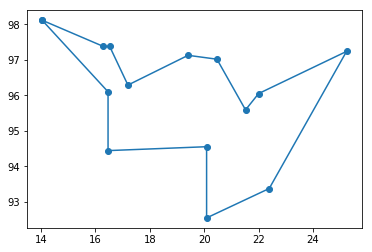

('Notre meilleur route : ', [9, 0, 1, 13, 2, 3, 4, 5, 11, 6, 12, 7, 10, 8, 9])
('Notre plus cours chemin : ', 3346.7619729999997)


In [18]:
sol = bestList
sol.append(bestList[0])
sol_coords = []
sol_lat = []
sol_long = []

for i in range(0,len(sol)):
    sol_coords.append(COORD[sol[i]])
    sol_lat.append(LAT[sol[i]])
    sol_long.append(LON[sol[i]])
    
print(sol_coords)

plt.plot(sol_lat,sol_long, '-o')
plt.show()

bestDistance = fitness(bestList)

print("Notre meilleur route : ", bestList)
print("Notre plus cours chemin : ", fitness(bestList))

Pyevolve 0.6rc1 - Graph Plot Tool
By Christian S. Perone

Loading modules....
Loading database and creating graph...
1000 generations found !


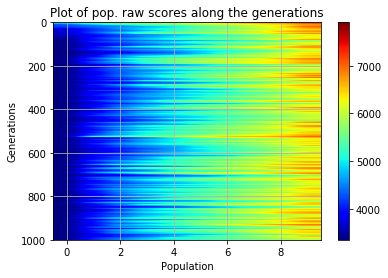

In [29]:
%run ./pyevolve_graph.py -i tsp -8 

Pyevolve 0.6rc1 - Graph Plot Tool
By Christian S. Perone

Loading modules....
Loading database and creating graph...
100 generations found !


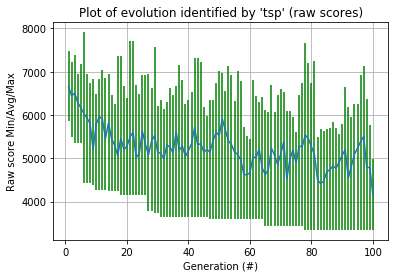

In [32]:
%run ./pyevolve_graph.py -i tsp -1 -g 1:100